# Perceptron from scratch

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.style.use('ggplot')

### Perceptron learning

In [9]:
A = np.array([[0,1],[2,3]])
b = [4,5]

for i,j in zip(A,b):
    print(i * j)

[0 4]
[10 15]


##### Implement

In [10]:
class Perceptron(object):
    
    def __init__(self, eta=.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
        
    def predict(self, X):
        net_input = np.dot(X, self.w_[1:]) + self.w_[0]
        return np.where(net_input >= 0.0, 1, -1)
        
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            error = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                error += int(update != 0.0)
            self.errors_.append(error)
        
        return self

##### Test Implementation

In [14]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
print(df.shape)
df.head()

(150, 5)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
print(y.shape, X.shape)

(100,) (100, 2)


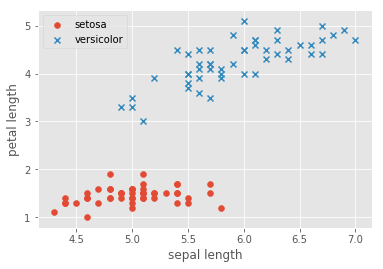

In [17]:
plt.scatter(X[:50, 0], X[:50, 1], marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [18]:
ppn = Perceptron()
ppn.fit(X, y)

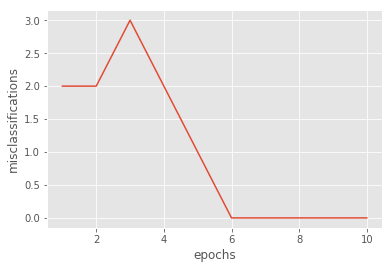

In [19]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.xlabel('epochs')
plt.ylabel('misclassifications')
plt.show()

In [27]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # marker generator
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y==c1, 0], y=X[y==c1, 1],
            alpha=.8,
            c=cmap(idx),
            marker=markers[idx],
            label=c1)

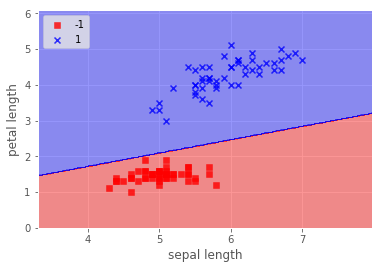

In [28]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

### Adaptive Linear Neuron (ADALINE)

##### Implement